# Naive Bayes Classification


## Using Seaborn library to import Iris dataset

In [47]:
import seaborn as sns

iris = sns.load_dataset('iris')
print("Type", type(iris))

iris.head()

('Type', <class 'pandas.core.frame.DataFrame'>)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


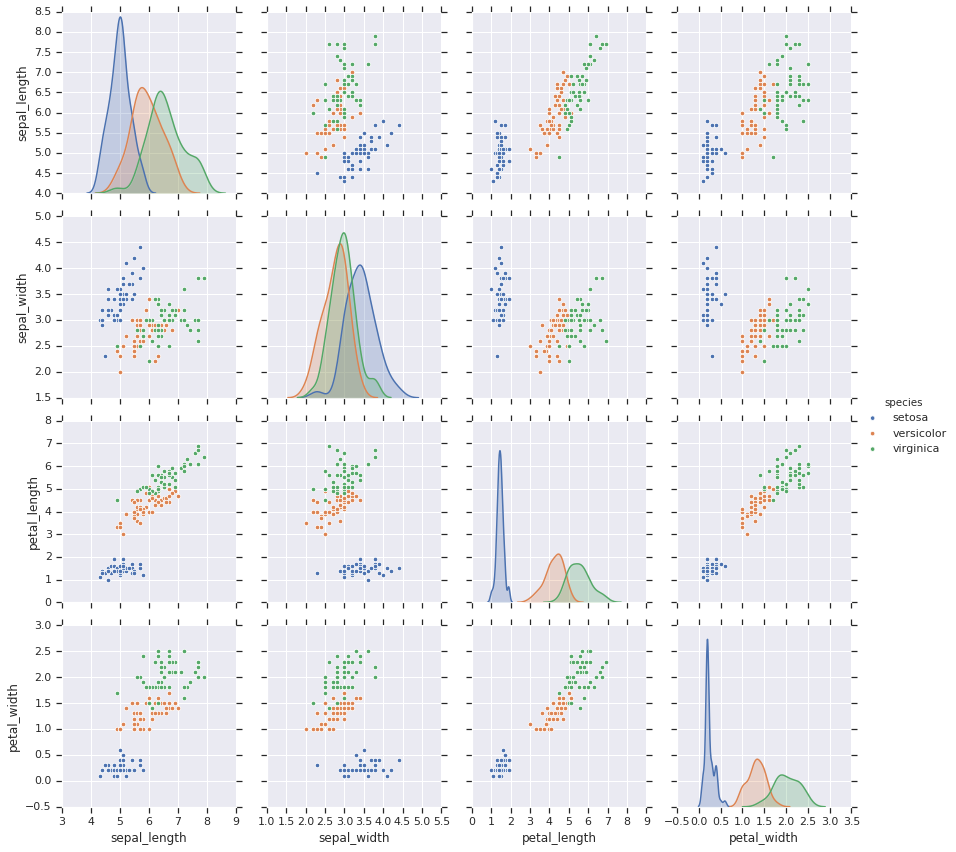

In [3]:
import matplotlib.pyplot as plt

sns.set()
sns.pairplot(iris, hue='species',size=3)
plt.show()

### Preparing the data

In [51]:
# extract the features matrix and target array from the pandas DataFrame

# feature
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [52]:
# target
y_iris = iris['species']
y_iris.shape

(150,)

## Supervised learning - Iris classification
We will use an extremely simple generative model known as Gaussian naive Bayes.

In [53]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [41]:
ytrain[ytrain.iloc[0:] == 'versicolor'] = 1
ytrain[ytrain.iloc[0:] == 'virginica'] = 2
ytrain[ytrain.iloc[0:] == 'setosa'] = 3

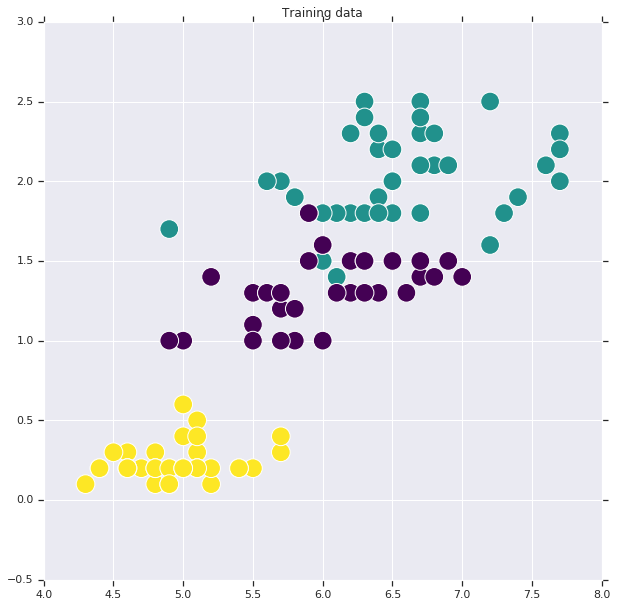

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(Xtrain.iloc[:,0:1], Xtrain.iloc[:,3:4], c=ytrain[:], s=350, cmap='viridis')
plt.title('Training data')
plt.show()

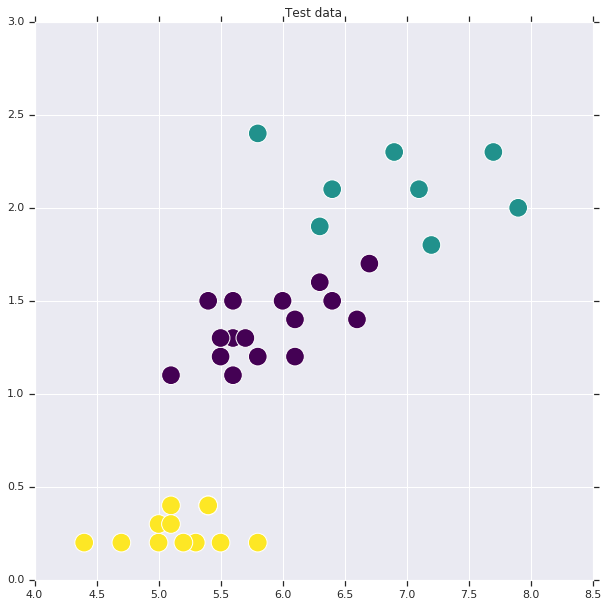

In [45]:
import matplotlib.pyplot as plt

ytest[ytest.iloc[0:] == 'versicolor'] = 1
ytest[ytest.iloc[0:] == 'virginica'] = 2
ytest[ytest.iloc[0:] == 'setosa'] = 3

plt.figure(figsize=(10,10))
plt.scatter(Xtest.iloc[:,0:1], Xtest.iloc[:,3:4], c=ytest[:], s=350, cmap='viridis')
plt.title('Test data')
plt.show()

In [54]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class

model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data

GaussianNB(priors=None)

In [55]:
y_model = model.predict(Xtest)             # 4. predict on new data

In [56]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.9736842105263158

In [58]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

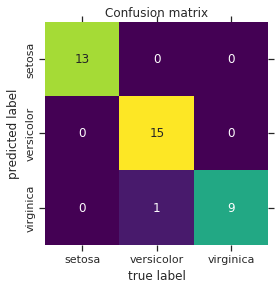

In [59]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='viridis',
            xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])

plt.title('Confusion matrix')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()